In [51]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from neuro_evolution import NEATRegressor, WANNRegressor
import matplotlib.pyplot as plt

In [17]:
data = load_diabetes()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
regr = NEATRegressor(
    number_of_generations=500,
    fitness_threshold=0.95,
    pop_size=200,
    activation_mutate_rate=0.075,
    activation_default='sigmoid'
)
neat_gnome = regr.fit(X_train, y_train)


 ****** Running generation 0 ****** 

Population's average fitness: -4.07430 stdev: 0.02164
Best fitness: -4.04958 - size: (1, 10) - species 1 - id 82
Average adjusted fitness: 0.028
Mean genetic distance 1.545, standard deviation 0.384
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   200     -4.0    0.028     0
Total extinctions: 0
Generation time: 0.163 sec

 ****** Running generation 1 ****** 

Population's average fitness: -4.05264 stdev: 0.02705
Best fitness: -3.79296 - size: (1, 10) - species 1 - id 220
Average adjusted fitness: 0.104
Mean genetic distance 1.977, standard deviation 0.384
Population of 200 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   195     -3.8    0.104     0
     2    0     5       --       --     0
Total extinctions: 0
Generation time: 0.167 sec (0.165 average)

 ****** Running generation 2 ****** 

R2 score:  0.4955241903682306
MSE 3200.5125380313502


[]

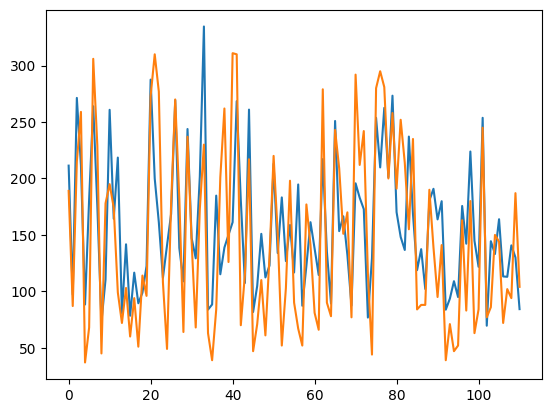

In [58]:
y_pred = neat_gnome.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
plt.plot(np.arange(y_pred.shape[0]), y_pred)
plt.plot(np.arange(y_pred.shape[0]), y_test)
plt.plot()

In [59]:
regr = WANNRegressor(
    single_shared_weights=[-2.0, -1.0, -0.5, 0.5, 1.0, 2.0],
    number_of_generations=150,
    pop_size=150,
    fitness_threshold=0.90,
    activation_default='relu'
)
wann_gnome = regr.fit(X_train, y_train)


 ****** Running generation 0 ****** 

Population's average fitness: -4.08074 stdev: 0.03150
Best fitness: -3.95853 - size: (1, 10) - species 1 - id 115
Average adjusted fitness: 0.022
Mean genetic distance 0.873, standard deviation 0.374
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150     -4.0    0.022     0
Total extinctions: 0
Generation time: 0.657 sec

 ****** Running generation 1 ****** 

Population's average fitness: -4.02425 stdev: 0.12785
Best fitness: -2.93059 - size: (1, 10) - species 1 - id 260
Average adjusted fitness: 0.323
Mean genetic distance 1.079, standard deviation 0.384
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150     -2.9    0.323     0
Total extinctions: 0
Generation time: 0.688 sec (0.672 average)

 ****** Running generation 2 ****** 

Population's average fitness: -4.05626 

R2 score:  0.33562873566647233
MSE 4214.926703738799


[]

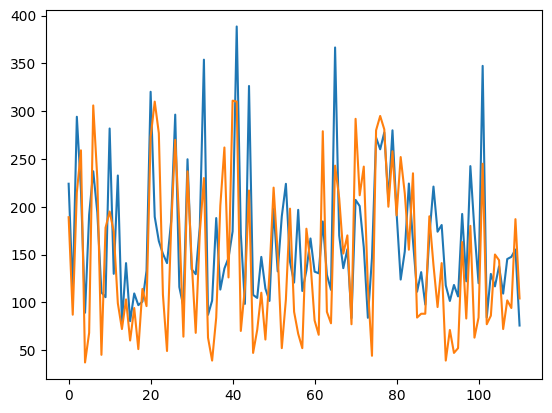

In [60]:
y_pred = wann_gnome.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
plt.plot(np.arange(y_pred.shape[0]), y_pred)
plt.plot(np.arange(y_pred.shape[0]), y_test)
plt.plot()